We start off by importing important libraries. Pandas which is an amazing data analysing library allows us to load, clean, and preprocess data easily. It provides data structures like DataFrames and Series, which enable us to handle tabular data efficiently. Pandas also supports various data operations, such as filtering, merging, and reshaping, which are essential for preparing data for training machine learning models. Numpy is a very useful library used for scientific computations.There is an open-source, commercially usable machine learning toolkit called scikit-learn. This toolkit contains implementations of many of the algorithms. LinearRegression is a popular class in scikit-learn (sklearn) library used for linear regression tasks. It allows you to fit a linear regression model to your data and make predictions based on that model.

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Now we read the csv file named "Salary_Data.csv" and store it's contents in a DataFrame called 'salary'

In [105]:
salary = pd.read_csv("Salary_Data.csv")

In [106]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


This code snippet to used to calculate the linear correlation between the salary column and the other column (here YearsExperience). For the linear regression model to make sense we should have a strong correlation between target column and columns used for making predictions.

In [107]:
salary.corr()["Salary"]

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

# Preparing training and test data
We will use 20% of the training data to prepare our testing dataset and rest 80% for training. The 20% of the rows selected would be completely random.

In [108]:
# Get the number of rows in the DataFrame
total_rows = salary.shape[0]

# Define the percentage of data to be used for the test dataset
test_percentage = 0.2

# Calculate the number of rows for the test dataset and round it to the nearest integer
num_test_rows = round(test_percentage * total_rows)

# Generate a random index for the test dataset rows
random_test_indices = np.random.choice(total_rows, num_test_rows, replace=False)

# Create the test dataset by selecting rows with random indices
test_dataset = salary.iloc[random_test_indices]

# Create the training dataset by excluding the test dataset rows
train_dataset = salary.drop(index=random_test_indices)

# Reset the index for both datasets
test = test_dataset.reset_index(drop=True)
train = train_dataset.reset_index(drop=True)

# Now, you have the test_dataset and train_dataset DataFrames ready for further use.


In [109]:
train.shape

(24, 2)

In [110]:
train

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,3.0,60150.0
4,3.2,54445.0
5,3.2,64445.0
6,3.9,63218.0
7,4.0,55794.0
8,4.0,56957.0
9,4.1,57081.0


In [111]:
test.shape

(6, 2)

We will set the columns to be used for making predictions and targets. Here predictors and target are dataframes.

In [112]:
predictors = ["YearsExperience"]
target = ["Salary"]

LinearRegression() creates an instance of the LinearRegression class. It initializes the linear regression model with default parameters..fit(train[predictors], train[target]) fits the linear regression model to the training data. The method takes two arguments:

train[predictors]: This is the DataFrame containing the predictor variables (features) that the model will use to make predictions. It represents the independent variables used for training the model.
train[target]: This is the DataFrame or Series containing the target variable that the model will attempt to predict. It represents the dependent variable used for training the model. The fit() method finds the best-fitting linear model to the training data using the Ordinary Least Squares (OLS) method, which calculates the optimal values for the coefficients (w) and the intercept (b) that minimize the sum of squared differences between the predicted and actual values. scikit-learn's LinearRegression class takes NumPy arrays or array-like data structures as input for the fit() method. It expects the input features (X_train, X_test, etc.) and target variable (y_train, y_test, etc.) to be in the form of 2-dimensional arrays.

In [113]:
x_train = train[predictors]
y_train = train[target]
x_test = test[predictors]
y_test = test[target]

In [114]:
reg = LinearRegression().fit(x_train,y_train)

The line of code predictions = reg.predict(test[predictors]) uses the fitted linear regression model (reg) to make predictions on new, unseen data represented by the predictor variables (test[predictors]).

In [115]:
predictions = reg.predict(x_test)

In [116]:
predictions

array([[ 72375.52615651],
       [102624.98025733],
       [ 54042.52367116],
       [ 45792.67255275],
       [ 47625.97280129],
       [ 61375.7246653 ]])

reg.score(X_test, y_test) to calculate the coefficient of determination (R-squared) specifically for the test data. The score() method in scikit-learn's LinearRegression class is used to evaluate the performance of the trained linear regression model on new, unseen data. R-squared is a metric that ranges from 0 to 1, with a higher value indicating a better fit of the model to the test data.

In [117]:
reg.score(x_test, y_test)

0.9348561254051754

Here we are getting a very high value for score indicating a very good performing model. We can try another metric called mean squared error to evaluate the performance of our model about which we will see in the next project.

Plotting results

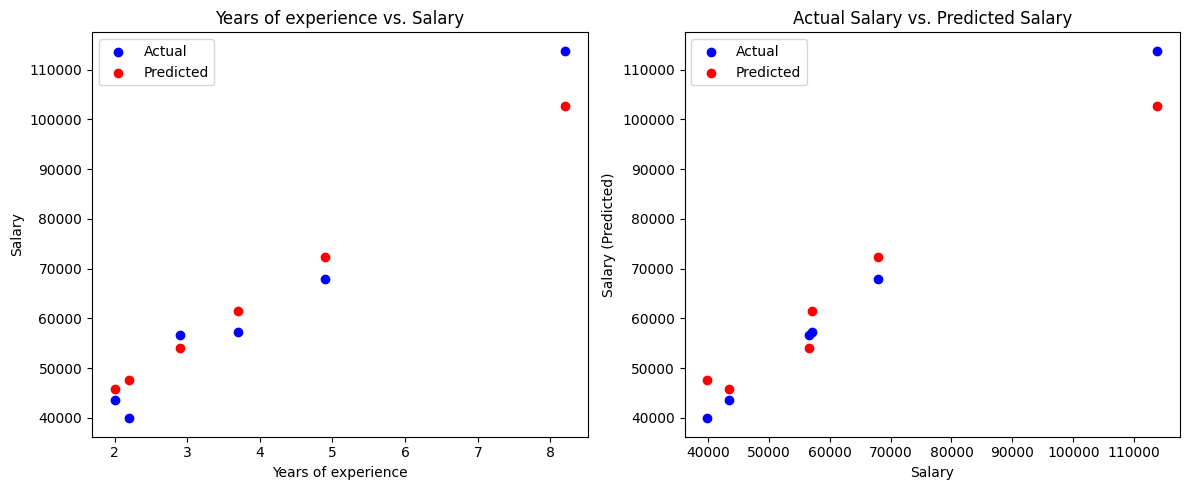

In [118]:
# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot for predictor variable vs. actual target variable
axs[0].scatter(x_test, y_test, label="Actual", color="blue")
axs[0].scatter(x_test, predictions, label="Predicted", color="red")
axs[0].set_xlabel("Years of experience")
axs[0].set_ylabel("Salary")
axs[0].set_title("Years of experience vs. Salary")
axs[0].legend()

# Second subplot for target variable vs. actual target variable
axs[1].scatter(y_test, y_test, label="Actual", color="blue")
axs[1].scatter(y_test, predictions, label="Predicted", color="red")
axs[1].set_xlabel("Salary")
axs[1].set_ylabel("Salary (Predicted)")
axs[1].set_title("Actual Salary vs. Predicted Salary")
axs[1].legend()

plt.tight_layout()
plt.show()